In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

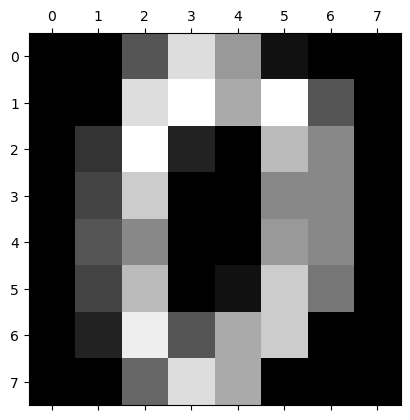

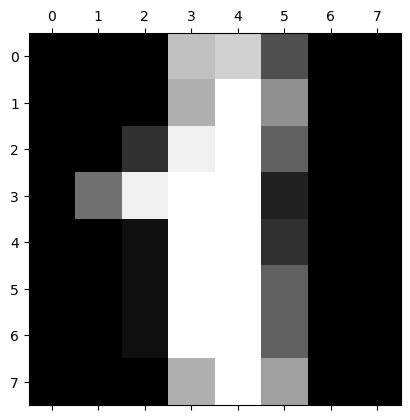

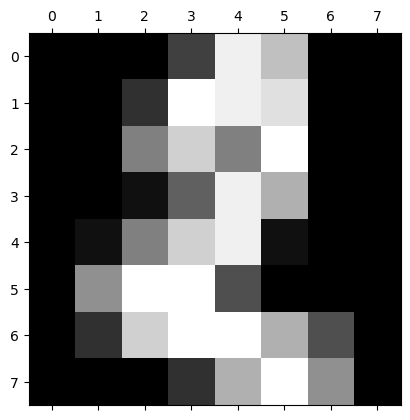

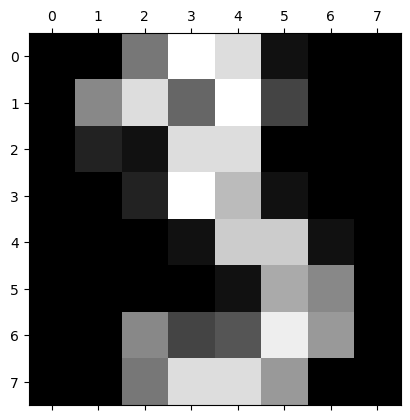

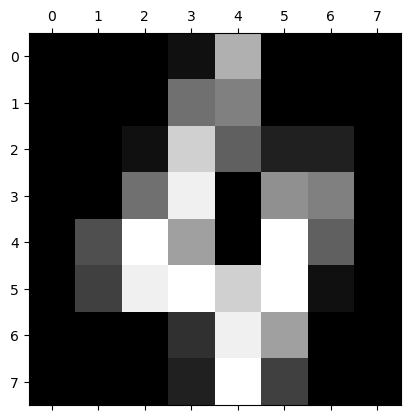

In [7]:
plt.gray()
for i in range(5): plt.matshow(digits.images[i])

In [8]:
digits.target[0:5]  # labels for above images

array([0, 1, 2, 3, 4])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [22]:
len(X_train)

1437

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "newton-cg")

In [36]:
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [37]:
model.score(X_test, y_test)

0.9611111111111111

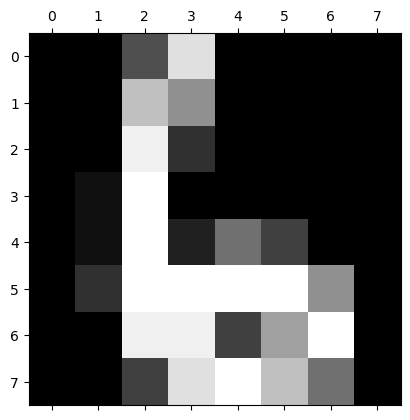

In [38]:
plt.matshow(digits.images[67])

In [39]:
digits.target[67]

6

In [40]:
model.predict([digits.data[67]])

array([6])

In [41]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Where did it go wrong?

In [42]:
y_predicted = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 45,  0,  0,  0,  0,  0,  2],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 30,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 28,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 27]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

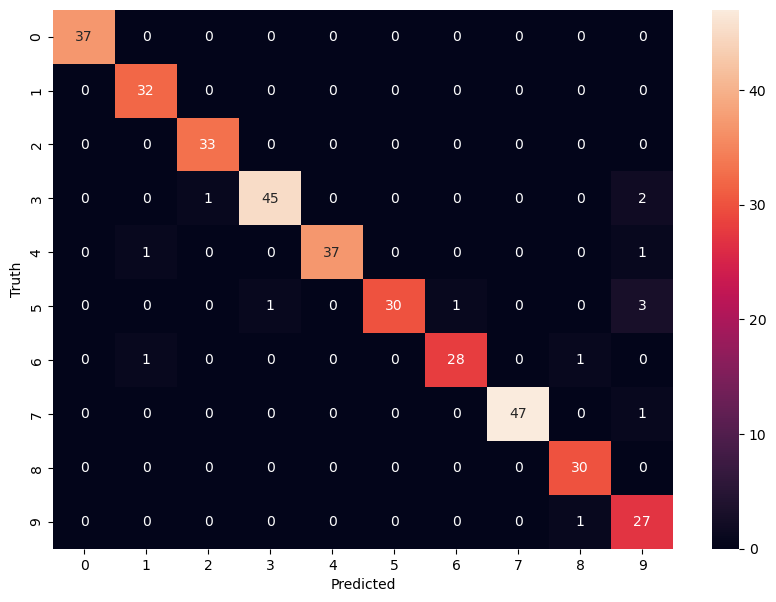

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# i,j denotes i was prdicted as j